### 자연어 처리 리뷰활용
* konlpy를 이용한 자연어처리
* 64bit mem 8G 이상 요망


In [4]:
import sqlite3
from konlpy.tag import *
from konlpy.utils import pprint

### 형태소 분석기 초기화

In [5]:
hannanum = Hannanum()
kkma = Kkma()
# komoran = Komoran() 메모리
###mecab = Mecab() 윈도우 지원 안해
okt = Okt()

C:\ProgramData\Anaconda3\lib\site-packages\jpype\_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [6]:

c="안녕하세요 여러분"
kkma.nouns(c[:40])
#hannanum.nouns(c[:40])
#pprint(kkma.sentences(u'네, 안녕하세요. 반갑습니다.'))
#pprint(kkma.nouns(u'질문이나 건의사항은 깃헙 이슈 트래커에 남겨주세요.'))

['안녕', '여러분']

In [7]:
dbname="car1.db" 

In [14]:
def seldb(tcode):
    with sqlite3.connect(dbname) as conn:
        cur=conn.cursor()
        sql="""
        select 
        IDX,TITLE,CONTENT,POINT

        """
        data=cur.execute(sql).fetchall()
        xdata=[]
        ydata=[]
        i=0
        for d in data:
            xdata.append(i)
            ydata.append(d[2])
            i+=1
            #print(d,end="\n")
        conn.commit()
        cur.close()
        return (xdata,ydata)

In [15]:
gdata=seldb(12)
print(gdata[1][:10])

OperationalError: no such column: IDX

In [55]:
nt=[]
for s in gdata[1]:
    ns=kkma.nouns(s)
    nt.append(ns)
print(nt)

[['기대', '줄', '기분', '보고', '머리', '한국', '한국영화', '영화', '발전', '스파이', '스파이더맨', '더', '맨', '급', '우울'], ['심장'], ['연극', '느낌', '송', '송새벽', '새벽', '니'], ['스릴러', '스릴러물', '물'], ['한국', '한국스릴러', '스릴러', '결정판', '고정', '감독', '다음', '다음작품', '작품', '장마', '영화'], ['출연', '배우', '배경', '배경공간', '공간', '한정적', '연출', '연기력', '커버하고도', '설정', '인물', '관계', '안', '스릴러', '긴장', '줄'], ['한국', '한국영화', '영화', '특징', '초반', '듯', '막판', '정리', '대부분', '끝', '흥미', '흥미진지', '진지', '한번', '보세', '강추'], ['스릴러', '스릴러물', '물', '제대'], ['가지', '감정', '감정선', '선', '표현', '스릴러'], ['반전', '반전간만', '간만', '영화'], ['시나리오', '연', '연기자', '기자', '연기', '몰입', '번', '영화'], ['몰입', '최고'], ['9', '9점', '점', 'ㅋ', 'ㅋ배우', '배우', '연기', '처음', '의심', '인물', '범인', '내', '줄'], ['영화'], ['잠', '짜증', '돈'], ['부천', '영화제', '권위'], ['유선', '유선언니', '언니', '연기', '연기짱', '짱'], ['쏘쏘'], ['사람', '결혼'], ['반전', '줄거리', '범인', '누', '누군지', '군지', '느낌'], ['볼만', '듯']]


In [67]:
nt=[]
for n in nt:
    ntall.extend(n)
print(ntall)    

[]


from collections import Counter
count = Counter(ntall)
print(count)

### 워드 클라우드

In [1]:
import matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
import matplotlib.font_manager as fm
font_location = 'malgun.ttf'  
#C:\\Users\\Administrator\\Documents\\asiasummer\\webdata\\
font_name = fm.FontProperties(fname = font_location).get_name()
matplotlib.rc('font', family = font_name)

print(font_name)

Malgun Gothic


In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


### 워드 클라우드를 위한 데이터 합치기

In [3]:
#plt.rcParams["font.family"] = 'Malgun Gothic'
from wordcloud import WordCloud
c= ""
for g in gdata[1]:
    c+=g
    
print(c[:100])


NameError: name 'gdata' is not defined

In [76]:
w = WordCloud(
    font_path = 'malgun.ttf',
    width = 800,
    height = 800
)
plt.figure(figsize=(12,12))
w=w.generate(c)
w.words_
print(w)

<Figure size 864x864 with 0 Axes>

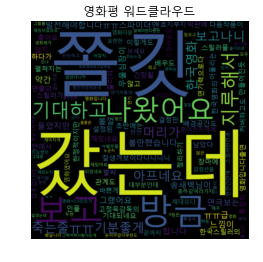

In [78]:
plt.imshow(w,interpolation='bilinear')
plt.axis('off')
plt.title("영화평 워드클라우드")
plt.savefig('moviecloud.jpg')
plt.show

In [73]:
f = open("stopmovie.txt", 'r',encoding='utf-8')
stopkr=[]
while True:
    line = f.readline()
    if not line: break
    stopkr.append(line.strip())
f.close()
print(stopkr[:10])

['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라']


In [98]:
import csv
f = open('stopkr.txt', 'r', encoding='utf-8')
rdr = csv.reader(f)
stopkr=[]
for line in rdr:
    stopword.append(line[0])
f.close() 
print(len(stopkr[:10]))

0


In [99]:
import nltk
from nltk.tokenize import word_tokenize 
nltk.download('punkt')
word=word_tokenize(c)
print(word[:10])

['방금', '보고', '나왔어요', '...', '기대하고', '갔는데', '지루해서', '죽는줄ㅠㅠ기분좋게', '갔는데', '보고나니']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lee\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [100]:

for w in word:
    if w not in stopkr:
        c+=w.strip()+' '
print(c[:100])

방금 보고 나왔어요...기대하고  갔는데  지루해서 죽는줄ㅠㅠ기분좋게 갔는데 보고나니 머리가  아프네요~한국영화  발전해야합니다ㅠㅠ스파이더맨  볼껄 그랬어요... ㅠㅠ급 우울심장이


### 불용어 제거 버전

<function matplotlib.pyplot.show(*args, **kw)>

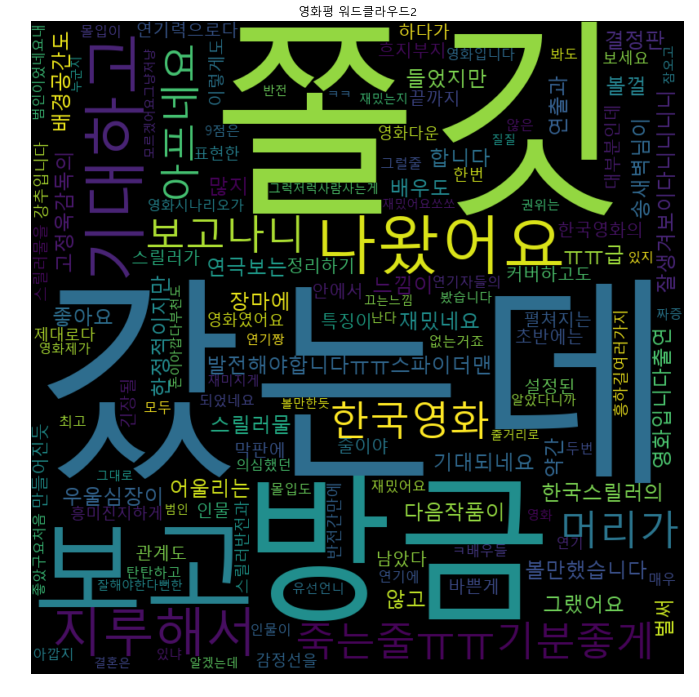

In [102]:
newc=''
w = WordCloud(
    font_path = 'malgun.ttf',
    width = 800,
    height = 800
)
plt.figure(figsize=(12,12))
w=w.generate(c)
w.words_
print(w)
plt.imshow(w,interpolation='bilinear')
plt.axis('off')
plt.title("영화평 워드클라우드2")
plt.savefig('moviecloud.jpg')
plt.show

### 단어 빈출 분석을 통한 의미 분석 

형태소 분석

In [105]:
ht=okt.pos(c)

print(ht[:50])

[('방금', 'Noun'), ('보고', 'Noun'), ('나왔어요', 'Verb'), ('...', 'Punctuation'), ('기대하고', 'Adjective'), ('갔는데', 'Verb'), ('지루해서', 'Adjective'), ('죽는줄', 'Verb'), ('ㅠㅠ', 'KoreanParticle'), ('기분', 'Noun'), ('좋게', 'Adjective'), ('갔는데', 'Verb'), ('보고나니', 'Verb'), ('머리', 'Noun'), ('가', 'Josa'), ('아프네요', 'Adjective'), ('~', 'Punctuation'), ('한국영', 'Noun'), ('화', 'Suffix'), ('발전', 'Noun'), ('해야', 'Verb'), ('합니다', 'Verb'), ('ㅠㅠ', 'KoreanParticle'), ('스파이더맨', 'Noun'), ('볼껄', 'Noun'), ('그랬어요', 'Adjective'), ('...', 'Punctuation'), ('ㅠㅠ', 'KoreanParticle'), ('급', 'Noun'), ('우울', 'Noun'), ('심장', 'Noun'), ('이', 'Josa'), ('쫄깃', 'Noun'), ('쫄깃', 'Noun'), ('...', 'Punctuation'), ('합니다', 'Verb'), ('.', 'Punctuation'), ('약간', 'Noun'), ('연극', 'Noun'), ('보는', 'Verb'), ('느낌', 'Noun'), ('이', 'Josa'), ('들었지만', 'Verb'), ('볼', 'Noun'), ('만', 'Josa'), ('했습니다', 'Verb'), ('.', 'Punctuation'), ('송새벽', 'Noun'), ('님', 'Suffix'), ('이', 'Josa')]


In [112]:
import json
import os, sys
import pprint
print(gdata)

['방금 보고 나왔어요...기대하고  갔는데  지루해서 죽는줄ㅠㅠ기분좋게 갔는데 보고나니 머리가  아프네요~한국영화  발전해야합니다ㅠㅠ스파이더맨  볼껄 그랬어요... ㅠㅠ급 우울', '심장이 쫄깃 쫄깃... 합니다.', '약간 연극보는 느낌이 들었지만 볼만했습니다.송새벽님이 잘생겨보이다니니니니^^~', '재밌네요.  스릴러물 좋아요..', '한국스릴러의 결정판!!! 벌써 고정욱감독의 다음작품이 기대되네요 장마에 어울리는 영화입니다', '출연 배우도 많지 않고 배경공간도 한정적이지만 연출과 연기력으로다 커버하고도 남았다!!  설정된 인물 관계도 안에서 펼쳐지는 스릴러가 이렇게도  긴장될 줄이야~', '한국영화의 특징이 초반에는 잘 만들어진듯 하다가 막판에 흐지부지 정리하기 바쁜게 대부분인데 끝까지 흥미진지하게 본 영화였어요 꼭 한번 보세요 강추입니다.', '스릴러물을 제대로다  흥하길', '여러가지 감정선을 잘 표현한 스릴러', '반전과 반전간만에 본 영화다운 영화']


In [168]:
origin=gdata
train_data=origin[:1200]
test_data=origin[1200:]
res=[]
def tokenize(data):
    res=[]
    t=''
    for t in okt.pos(data,stem=True,norm=True):
        res.append('/'.join(t))
    return res
def makedata(data):
    res=[]
    for td in train_data:
        res.append(tokenize(td))
    return res
r=makedata(train_data)
print(r[:10])

[['방금/Noun', '보고/Noun', '나오다/Verb', '.../Punctuation', '기대하다/Adjective', '가다/Verb', '지루하다/Adjective', '죽다/Verb', 'ㅠㅠ/KoreanParticle', '기분/Noun', '좋다/Adjective', '가다/Verb', '보다/Verb', '머리/Noun', '가/Josa', '아프다/Adjective', '~/Punctuation', '한국영/Noun', '화/Suffix', '발전/Noun', '하다/Verb', '하다/Verb', 'ㅠㅠ/KoreanParticle', '스파이더맨/Noun', '볼껄/Noun', '그렇다/Adjective', '.../Punctuation', 'ㅠㅠ/KoreanParticle', '급/Noun', '우울/Noun'], ['심장/Noun', '이/Josa', '쫄깃/Noun', '쫄깃/Noun', '.../Punctuation', '하다/Verb', './Punctuation'], ['약간/Noun', '연극/Noun', '보다/Verb', '느낌/Noun', '이/Josa', '들다/Verb', '볼/Noun', '만/Josa', '하다/Verb', './Punctuation', '송새벽/Noun', '님/Suffix', '이/Josa', '잘생기다/Adjective', '보이/Noun', '다니다/Verb', '^^~/Punctuation'], ['재밌다/Adjective', './Punctuation', '스릴러물/Noun', '좋다/Adjective', '../Punctuation'], ['한국/Noun', '스릴러/Noun', '의/Josa', '결정/Noun', '판/Noun', '!!!/Punctuation', '벌써/Noun', '고정욱/Noun', '감독/Noun', '의/Josa', '다음/Noun', '작품/Noun', '이/Josa', '기대/Noun', '되다/Verb', '장마/Noun', '에/Josa', '어울

In [170]:
train_file='train_data.json'
test_file='test_data.json'

if os.path.isfile('train_file'):
    with open(train_file,'r',encoding='utf-8') as f:
        train_doc=json.load(f)
else:
    train_doc=makedata(train_data)

if os.path.isfile('test_file'):
    with open(test_file,'r',encoding='utf-8') as f:
        test_doc=json.load(f)
else:
    test_doc=makedata(test_data)
print(len(train_doc))
print(len(test_doc))


10
10


### 빈도수 추출을 위해 형태소를 한군데로 모으기

In [176]:
tokens=[t for tr in train_doc for t in tr]
print(tokens[:20])

['방금/Noun', '보고/Noun', '나오다/Verb', '.../Punctuation', '기대하다/Adjective', '가다/Verb', '지루하다/Adjective', '죽다/Verb', 'ㅠㅠ/KoreanParticle', '기분/Noun', '좋다/Adjective', '가다/Verb', '보다/Verb', '머리/Noun', '가/Josa', '아프다/Adjective', '~/Punctuation', '한국영/Noun', '화/Suffix', '발전/Noun']


### 토큰분석을 위한 nltk객체생성

In [177]:
txt=nltk.Text(tokens, name='nlmovie')
print(txt)

<Text: nlmovie>


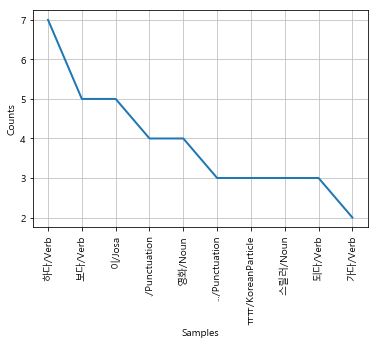

In [178]:
txt.plot(10)

### 빈도순으로 추출된 토큰 준비

In [191]:
sel_token=[f[0] for f in txt.vocab().most_common(100)]
print(sel_data[:10])

['하다/Verb', '보다/Verb', '이/Josa', './Punctuation', '영화/Noun', '.../Punctuation', 'ㅠㅠ/KoreanParticle', '스릴러/Noun', '되다/Verb', '가다/Verb']


### 학습용데이터 생성

* train_x:워드벡터
* train_y:점수

In [253]:
def frev(doc):
    return [doc.count(stoken) for stoken in sel_token]

doc=train_doc
print(doc)

train_x=[frev(d) for d in train_doc]
train_y=[d for d in train_doc]
test_x=[frev(d) for d in test_doc]
test_y=[d for d in test_doc]
#train_y[:2]

[['방금/Noun', '보고/Noun', '나오다/Verb', '.../Punctuation', '기대하다/Adjective', '가다/Verb', '지루하다/Adjective', '죽다/Verb', 'ㅠㅠ/KoreanParticle', '기분/Noun', '좋다/Adjective', '가다/Verb', '보다/Verb', '머리/Noun', '가/Josa', '아프다/Adjective', '~/Punctuation', '한국영/Noun', '화/Suffix', '발전/Noun', '하다/Verb', '하다/Verb', 'ㅠㅠ/KoreanParticle', '스파이더맨/Noun', '볼껄/Noun', '그렇다/Adjective', '.../Punctuation', 'ㅠㅠ/KoreanParticle', '급/Noun', '우울/Noun'], ['심장/Noun', '이/Josa', '쫄깃/Noun', '쫄깃/Noun', '.../Punctuation', '하다/Verb', './Punctuation'], ['약간/Noun', '연극/Noun', '보다/Verb', '느낌/Noun', '이/Josa', '들다/Verb', '볼/Noun', '만/Josa', '하다/Verb', './Punctuation', '송새벽/Noun', '님/Suffix', '이/Josa', '잘생기다/Adjective', '보이/Noun', '다니다/Verb', '^^~/Punctuation'], ['재밌다/Adjective', './Punctuation', '스릴러물/Noun', '좋다/Adjective', '../Punctuation'], ['한국/Noun', '스릴러/Noun', '의/Josa', '결정/Noun', '판/Noun', '!!!/Punctuation', '벌써/Noun', '고정욱/Noun', '감독/Noun', '의/Josa', '다음/Noun', '작품/Noun', '이/Josa', '기대/Noun', '되다/Verb', '장마/Noun', '에/Josa', '어울

### 머신러닝을 위한 형변환

In [214]:
import numpy as np
train_x=np.asarray(train_x).astype('float32')
train_y=np.asarray(train_y).astype('float32')
test_x=np.asarray(test_x).astype('float32')
test_y=np.asarray(test_y).astype('float32')


ValueError: setting an array element with a sequence.

In [250]:
from tensorflow.keras import models
from tensorflow.keras import layers

#from tensorflow.keras import optimizer
from tensorflow.keras import losses
from tensorflow.keras import metrics
#from tensorflow.keras import layers.Dense


In [252]:
model=models.Sequential()
model.add(layers.Dense(64,activation='relu', input_shape=(100,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='adam'
             , loss=losses.binary_crossentropy
             , metrics=[metrics.binary_accuracy])
model.fit(train_x,train_y,epochs=10,batch_size=512)
result=model.evaluate(test_x,test_y)


ValueError: Error when checking model target: the list of Numpy arrays that you are passing to your model is not the size the model expected. Expected to see 1 array(s), but instead got the following list of 10 arrays: [array([['방금/Noun'],
       ['보고/Noun'],
       ['나오다/Verb'],
       ['.../Punctuation'],
       ['기대하다/Adjective'],
       ['가다/Verb'],
       ['지루하다/Adjective'],
       ['죽다/Verb'],
       ['ㅠㅠ/Kore...